# **TC5035 Proyecto Integrador**

## Maestría en Inteligencia Artificial Aplicada
#### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso

### **Avance 2. Ingeniería de características**

**Equipo # 6 - IBM Lámparas automotrices**

| Integrantes  | Matricula |
|---------|------|
| Luis Carlos Alberto Espinosa Alvarado | A00816016 |
| Daniela Hernández Sánchez | A01733771 |
| Andrea Jelena Ramírez García | A01733905 |


In [ ]:
!pip install PyPDF2

In [ ]:
!pip install pdfplumber nltk langdetect

In [ ]:
!pip install spacy~=3.1

In [ ]:
from google.colab import drive # necesario agregar para cargar datos en Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
import pandas as pd
from PyPDF2 import PdfReader

# Ruta de la carpeta donde están los documentos
carpeta = '/content/drive/MyDrive/Colab Notebooks/MNA/TC5035 - Proyecto Integrador/Avance 1/data/normas'

# Lista para almacenar la información
data = []

# Leer todos los archivos PDF de la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.pdf'):
        pdf_path = os.path.join(carpeta, archivo)
        reader = PdfReader(pdf_path)
        texto = ''
        for pagina in reader.pages:
            texto += pagina.extract_text() + ' '
        data.append({'nombre_documento': archivo, 'texto': texto.strip()})

# Crear DataFrame
df = pd.DataFrame(data)
df.head()



,nombre_documento,texto
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc..."
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU..."
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...


In [ ]:
print(df.columns)
df.head(8)

Index(['nombre_documento', 'texto'], dtype='object')


,nombre_documento,texto
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc..."
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU..."
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...
5,General Test Spec.pdf,CONFIDENTIAL Page 1 of 80 11/4/2011 \n \nDe...
6,TestPlan_Grillelamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...
7,TestPlan_Headlamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...


In [ ]:
print(data)

[{'nombre_documento': 'NOM-236-SE-2021.pdf', 'texto': 'NORMA  Oficial Mexicana NOM-236-SE-2021, Vehículos automotor es-Condiciones fisicomecánicas de los vehículos con peso bruto vehicular\nque no exceda 3,857 kg.\nAl margen un sello con el Escudo Nacional, que dice: Estados Unidos Mexicanos.- ECONOMÍA.- Secretaría  de Economía.-\nUnidad de Normatividad, Competitividad y Competencia.- Dirección General de Normas.\nNORMA OFICIAL MEXICANA NOM-236-SE-2021, "VEHÍCULOS AUTOMOTORES-CONDICIONES FISICOMECÁNICAS DE LOS VEHÍCULOS\nCON PESO BRUTO VEHICULAR QUE NO EXCEDA 3,857 KG".\nALFONSO GUA TI ROJO SÁNCHEZ, Director General de Normas y Presidente del Comité Consultivo  Nacional de Normalización de\nla Secretaría de Economía (CCONNSE), con fundamento en los artículos 34 fracciones II, XIII y XXXIII de la Ley Orgánica de la\nAdministración Pública Federal; 4 de la Ley Federal de Procedimiento Administrativo; 3 fracción XI, 39 fracciones V y XII, 40 fracción I,\n41, 47 fracción IV de la Ley Feder

# **Generación de características de texto**

Longitud del documento (número de palabras):

In [ ]:
df['num_palabras'] = df['texto'].apply(lambda x: len(x.split()))

Conteo de palabras clave relevantes (ejemplo: “LED”, “intensidad”, “ángulo”)

In [ ]:
keywords = ['LED', 'xenón', 'halógena', 'intensidad', 'ángulo',  'vehículo',  'Vehicle']

for palabra in keywords:
    df[f'contiene_{palabra}'] = df['texto'].str.contains(palabra, case=False).astype(int)

Detección de idioma (español o inglés)

Esto nos ayuda a generar características separadas si necesitamos traducir o procesar de manera diferente.

In [ ]:
from langdetect import detect

df['idioma'] = df['texto'].apply(lambda x: detect(x))

In [ ]:
print(df)

                                nombre_documento  \
0                            NOM-236-SE-2021.pdf   
1                      UN Regulation No. 112.pdf   
2  SAE J387TerminologyMotor Vehicle Lighting.pdf   
3                        FMVSS 108 (EE. UU.).pdf   
4                       UN Regulation No. 48.pdf   
5                          General Test Spec.pdf   
6                        TestPlan_Grillelamp.pdf   
7                          TestPlan_Headlamp.pdf   

                                               texto  num_palabras  \
0  NORMA  Oficial Mexicana NOM-236-SE-2021, Vehíc...          4507   
1  E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...         16813   
2  By Authority OfTHE UNITED STATES OF AMERICALeg...            99   
3  TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU...         97414   
4  GE.19-19324 (E) \n\n  Agreement  \n ...         11585   
5  CONFIDENTIAL  Page 1 of 80 11/4/2011  \n  \nDe...         24271   
6  Test Plan for CS.0005 6 \nApproval #: 

In [ ]:
df.head(8)

,nombre_documento,texto,num_palabras,contiene_LED,contiene_xenón,contiene_halógena,contiene_intensidad,contiene_ángulo,contiene_vehículo,contiene_Vehicle,idioma
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc...",4507,1,0,0,0,0,1,1,es
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...,16813,1,0,0,0,0,0,1,en
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...,99,0,0,0,0,0,0,1,en
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU...",97414,1,0,0,0,0,0,1,en
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...,11585,1,0,0,0,0,0,1,en
5,General Test Spec.pdf,CONFIDENTIAL Page 1 of 80 11/4/2011 \n \nDe...,24271,1,0,0,0,0,0,1,en
6,TestPlan_Grillelamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3564,1,0,0,0,0,0,1,en
7,TestPlan_Headlamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3886,1,0,0,0,0,0,1,en


# **Discretización o binning**
Tomamos un conjunto continuo o muy variado de documentos (texto completo).

Los agrupamos en categorías discretas según su contenido o propósito.

Esto convierte información textual compleja en una variable categórica que el modelo puede usar fácilmente.

In [ ]:
# Definir categorías según palabras clave
def clasificar_norma(texto):
    texto = texto.lower()
    if 'seguridad' in texto or 'protección' in texto:
        return 'seguridad'
    elif 'intensidad' in texto or 'ángulo' in texto:
        return 'rendimiento_luminoso'
    elif 'etiquetado' in texto or 'marcado' in texto:
        return 'etiquetado'
    else:
        return 'otros'

df['tipo_norma'] = df['texto'].apply(clasificar_norma)


In [ ]:
df['tipo_norma'].value_counts()


,count
tipo_norma,
otros,7
seguridad,1


In [ ]:
df.head(8)


,nombre_documento,texto,num_palabras,contiene_LED,contiene_xenón,contiene_halógena,contiene_intensidad,contiene_ángulo,contiene_vehículo,contiene_Vehicle,idioma,tipo_norma
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc...",4507,1,0,0,0,0,1,1,es,seguridad
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...,16813,1,0,0,0,0,0,1,en,otros
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...,99,0,0,0,0,0,0,1,en,otros
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU...",97414,1,0,0,0,0,0,1,en,otros
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...,11585,1,0,0,0,0,0,1,en,otros
5,General Test Spec.pdf,CONFIDENTIAL Page 1 of 80 11/4/2011 \n \nDe...,24271,1,0,0,0,0,0,1,en,otros
6,TestPlan_Grillelamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3564,1,0,0,0,0,0,1,en,otros
7,TestPlan_Headlamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3886,1,0,0,0,0,0,1,en,otros


# **Codificación One-Hot**
Convierte cada categoría en una columna binaria, 1 si el documento pertenece a esa categoría, 0 si no.

Perfecto para variables sin orden como tipo_norma

Los modelos de aprendizaje automático no pueden procesar directamente variables de texto.

Codificar las categorías en números (ordinal o one-hot) permite que el modelo aprenda patrones de manera efectiva.

One-hot es preferido cuando no hay orden, para evitar que el modelo interprete relaciones inexistentes.

In [ ]:
df_onehot = pd.get_dummies(df, columns=['tipo_norma'])
df_onehot.head(8)


,nombre_documento,texto,num_palabras,contiene_LED,contiene_xenón,contiene_halógena,contiene_intensidad,contiene_ángulo,contiene_vehículo,contiene_Vehicle,idioma,tipo_norma_otros,tipo_norma_seguridad
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc...",4507,1,0,0,0,0,1,1,es,False,True
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...,16813,1,0,0,0,0,0,1,en,True,False
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...,99,0,0,0,0,0,0,1,en,True,False
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU...",97414,1,0,0,0,0,0,1,en,True,False
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...,11585,1,0,0,0,0,0,1,en,True,False
5,General Test Spec.pdf,CONFIDENTIAL Page 1 of 80 11/4/2011 \n \nDe...,24271,1,0,0,0,0,0,1,en,True,False
6,TestPlan_Grillelamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3564,1,0,0,0,0,0,1,en,True,False
7,TestPlan_Headlamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,3886,1,0,0,0,0,0,1,en,True,False


# **Escalamiento**
Las variables numéricas pueden tener rangos muy distintos (por ejemplo, num_palabras puede ir de 100 a 5000, mientras que contiene_LED es 0 o 1).

Escalar o transformar ayuda a que los modelos aprendan mejor, especialmente redes neuronales o algoritmos basados en distancia (KNN, SVM).

Min-Max Scaling

Escala los valores entre 0 y 1.

Mejora la convergencia en modelos de aprendizaje automático.

Evita que variables con valores grandes dominen a las pequeñas.

Mantiene la interpretación de las características derivadas de los textos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['num_palabras']] = scaler.fit_transform(df[['num_palabras']])


In [ ]:
df.head(8)


,nombre_documento,texto,num_palabras,contiene_LED,contiene_xenón,contiene_halógena,contiene_intensidad,contiene_ángulo,contiene_vehículo,contiene_Vehicle,idioma,tipo_norma
0,NOM-236-SE-2021.pdf,"NORMA Oficial Mexicana NOM-236-SE-2021, Vehíc...",0.045296,1,0,0,0,0,1,1,es,seguridad
1,UN Regulation No. 112.pdf,E/ECE/324 \nE/ECE/TRANS/505} Rev.2/Add.111/Rev...,0.171752,1,0,0,0,0,0,1,en,otros
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,By Authority OfTHE UNITED STATES OF AMERICALeg...,0.000000,0,0,0,0,0,0,1,en,otros
3,FMVSS 108 (EE. UU.).pdf,"TP-108-13 \nDRAFT \nDecember 4, 2007 \n \n \nU...",1.000000,1,0,0,0,0,0,1,en,otros
4,UN Regulation No. 48.pdf,GE.19-19324 (E) \n\n Agreement \n ...,0.118029,1,0,0,0,0,0,1,en,otros
5,General Test Spec.pdf,CONFIDENTIAL Page 1 of 80 11/4/2011 \n \nDe...,0.248389,1,0,0,0,0,0,1,en,otros
6,TestPlan_Grillelamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,0.035606,1,0,0,0,0,0,1,en,otros
7,TestPlan_Headlamp.pdf,Test Plan for CS.0005 6 \nApproval #: Origi...,0.038915,1,0,0,0,0,0,1,en,otros


# **Transformación**

Ajustar la distribución de las variables que están muy sesgadas o con valores extremos.

Facilita que los modelos capturen relaciones lineales y patrones importantes.



In [ ]:
#Transformación logarítmica
import numpy as np

df['num_palabras_log'] = df['num_palabras'].apply(lambda x: np.log1p(x))


In [ ]:
#Raíz cuadrada
df['num_palabras_sqrt'] = df['num_palabras'].apply(lambda x: np.sqrt(x))


In [ ]:
#Box-Cox
from scipy import stats
df['num_palabras_boxcox'], _ = stats.boxcox(df['num_palabras'] + 1)  # sumar 1 para evitar cero


In [ ]:
#Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['num_palabras_yeojohnson'] = pt.fit_transform(df[['num_palabras']])


In [ ]:
df[['num_palabras', 'num_palabras_log', 'num_palabras_sqrt', 'num_palabras_boxcox', 'num_palabras_yeojohnson']].describe()


,num_palabras,num_palabras_log,num_palabras_sqrt,num_palabras_boxcox,num_palabras_yeojohnson
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,0.207248,0.162817,0.356895,0.077913,5.551115e-17
std,0.330874,0.226719,0.302134,0.063424,1.069045e+00
min,0.000000,0.000000,0.000000,0.000000,-1.313278e+00
25%,0.038088,0.037379,0.195125,0.034028,-7.397190e-01
50%,0.081663,0.077934,0.278191,0.062363,-2.621039e-01
75%,0.190911,0.174338,0.435419,0.114730,6.205625e-01
max,1.000000,0.693147,1.000000,0.190329,1.894836e+00


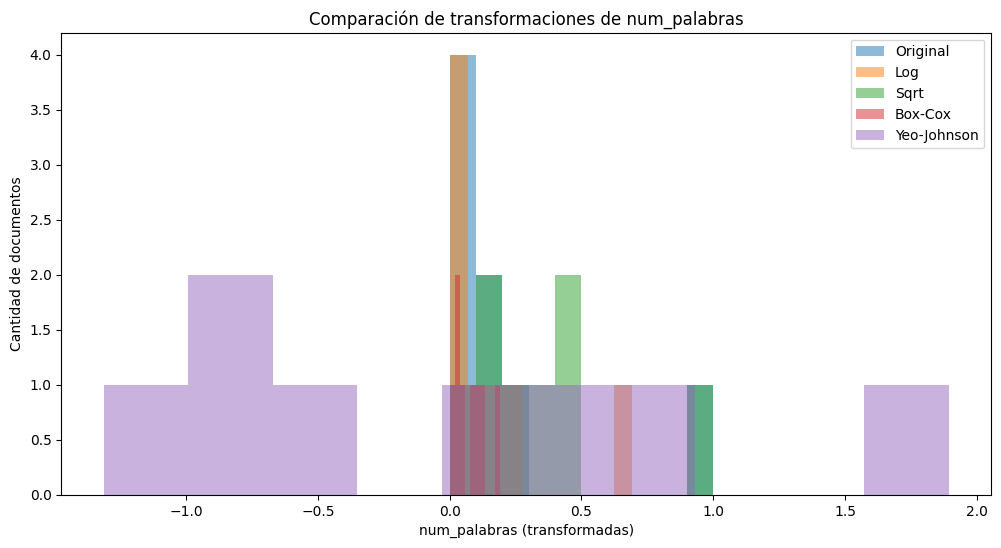

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(df['num_palabras'], bins=10, alpha=0.5, label='Original')
plt.hist(df['num_palabras_log'], bins=10, alpha=0.5, label='Log')
plt.hist(df['num_palabras_sqrt'], bins=10, alpha=0.5, label='Sqrt')
plt.hist(df['num_palabras_boxcox'], bins=10, alpha=0.5, label='Box-Cox')
plt.hist(df['num_palabras_yeojohnson'], bins=10, alpha=0.5, label='Yeo-Johnson')
plt.legend()
plt.xlabel('num_palabras (transformadas)')
plt.ylabel('Cantidad de documentos')
plt.title('Comparación de transformaciones de num_palabras')
plt.show()


Al analizar la variable num_palabras, se observó que la distribución original estaba sesgada y presentaba gran dispersión entre documentos cortos y largos. Las transformaciones aplicadas mostraron efectos diferentes: la logarítmica y la raíz cuadrada suavizan la dispersión, siendo el logarítmico más agresivo; Box-Cox reduce fuertemente la influencia de valores extremos; y Yeo-Johnson centra la distribución y la hace más simétrica. Estas transformaciones permiten preparar la variable de manera que los modelos de IA puedan aprender patrones de forma más estable y eficiente.

# **Métodos de filtrado para la selección de características y técnicas de extracción de características**

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 96.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords

# Descargar stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))
stopwords_en = set(stopwords.words('english'))

# Cargar modelos de spaCy
nlp_es = spacy.load("es_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lematización**

Lematizar es un paso clave en el procesamiento de lenguaje natural (NLP) porque permite reducir la variabilidad de las palabras y mejorar la calidad de análisis de texto. Permite que tu análisis se enfoque en el significado de las palabras, no en sus formas flexionadas, lo cual es esencial para que TF-IDF, PCA o cualquier modelo NLP funcione correctamente.

In [ ]:
# Función de limpieza con idioma ---
def limpiar_texto(texto, idioma='es'):
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)                       # eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)                   # eliminar símbolos
    texto = re.sub(r'\s+', ' ', texto).strip()              # espacios extra

    stop_set = stopwords_es if idioma == 'es' else stopwords_en
    palabras = [w for w in texto.split() if w not in stop_set]
    return ' '.join(palabras)

# Función de lematización con idioma ---
def lematizar(texto, idioma='es'):
    if idioma == 'es':
        doc = nlp_es(texto)
    else:
        doc = nlp_en(texto)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Detección del idioma por documento ---
def detectar_idioma(nombre_doc):
    """Asigna idioma: primer documento español, los demás inglés."""
    if nombre_doc == df['nombre_documento'].iloc[0]:
        return 'es'
    else:
        return 'en'

In [ ]:
#  Aplicación a los datos
df['idioma'] = df['nombre_documento'].apply(detectar_idioma)
df['texto_limpio'] = df.apply(lambda x: limpiar_texto(x['texto'], x['idioma']), axis=1)
df['texto_lematizado'] = df.apply(lambda x: lematizar(x['texto_limpio'], x['idioma']), axis=1)

# Visualización
df[['nombre_documento', 'idioma', 'texto_lematizado']].head(8)

,nombre_documento,idioma,texto_lematizado
0,NOM-236-SE-2021.pdf,es,norma oficial mexicana nomse vehículo automoto...
1,UN Regulation No. 112.pdf,en,eece eecetrans revaddrev october agreement con...
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,en,authority ofthe united states americalegally b...
3,FMVSS 108 (EE. UU.).pdf,en,tp draft december department transportation na...
4,UN Regulation No. 48.pdf,en,ge e agreement concern adoption harmonize tech...
5,General Test Spec.pdf,en,confidential page design verification test app...
6,TestPlan_Grillelamp.pdf,en,test plan cs approval original date publish ja...
7,TestPlan_Headlamp.pdf,en,test plan cs approval original date publish ja...


**Codificación TF-IDF**

Usamos TF-IDF porque nos permite identificar qué palabras son más importantes en cada documento y al mismo tiempo ignorar las palabras comunes que no aportan información, como “el” o “la”.
Esto hace que podamos comparar documentos de forma más precisa y analizar su contenido real sin que palabras irrelevantes distorsionen los resultados.

In [ ]:
# Codificación TF-IDF (Transformación de texto a vectores)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(df['texto_lematizado'])

print("Dimensión de la matriz TF-IDF:", X_tfidf.shape)

Dimensión de la matriz TF-IDF: (8, 3000)


**Correlación**

Usamos matriz de correlación para medir qué tan similares o relacionados están los documentos entre sí según su contenido.
La correlación nos permite identificar patrones, ver cuáles documentos comparten temas o palabras importantes, y facilitar análisis como clustering o visualización. Observamos pares con alta similitud (p. ej., un doc par con correlación ≈ 0.98–0.99), lo cual sugiere temáticas casi idénticas o duplicidad parcial.

¿Para qué sirvió?

Este análisis no se usó como filtro de features, sino como diagnóstico de similitud entre documentos: ayuda a detectar duplicados/near-duplicates, agrupar por temática y motivar una reducción adicional mediante proyección (PCA) para visualización o clustering.

Con n=8, un filtro de correlación entre características (3000 columnas) sería inestable (alta probabilidad de falsas relaciones por pocos grados de libertad). Por eso no eliminamos features por correlación en esta fase.

In [ ]:
# Correlación de documentos
dfcorr = pd.DataFrame(X_tfidf.toarray(), index=[f'Doc{i+1}' for i in range(len(data))],
                  columns=vectorizer.get_feature_names_out())

# Matriz de correlación entre documentos
corr_docs = dfcorr.T.corr()  # usamos la transpuesta para correlacionar filas
print(corr_docs)

          Doc1      Doc2      Doc3      Doc4      Doc5      Doc6      Doc7  \
Doc1  1.000000 -0.039341  0.000695 -0.061096 -0.037167 -0.046823 -0.032574   
Doc2 -0.039341  1.000000  0.069931  0.293765  0.271269  0.274386  0.091106   
Doc3  0.000695  0.069931  1.000000  0.020911  0.071332  0.045188 -0.001065   
Doc4 -0.061096  0.293765  0.020911  1.000000  0.185280  0.466304  0.195022   
Doc5 -0.037167  0.271269  0.071332  0.185280  1.000000  0.137811 -0.008901   
Doc6 -0.046823  0.274386  0.045188  0.466304  0.137811  1.000000  0.136437   
Doc7 -0.032574  0.091106 -0.001065  0.195022 -0.008901  0.136437  1.000000   
Doc8 -0.033354  0.097118 -0.001319  0.199958 -0.007796  0.142311  0.986458   

          Doc8  
Doc1 -0.033354  
Doc2  0.097118  
Doc3 -0.001319  
Doc4  0.199958  
Doc5 -0.007796  
Doc6  0.142311  
Doc7  0.986458  
Doc8  1.000000  


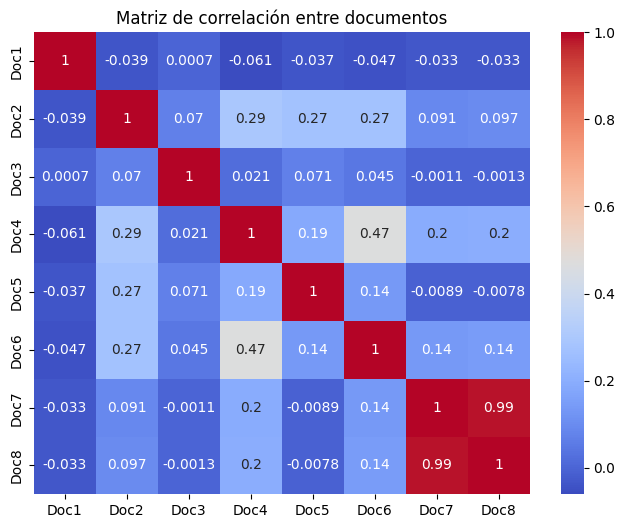

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_docs, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre documentos")
plt.show()

**Umbral de varianza**

Usamos un umbral de varianza para eliminar características que casi no varían entre los documentos, ya que estas palabras no aportan información relevante.
Esto reduce dimensionalidad, mejora el rendimiento de los modelos y evita que el análisis se vea afectado por ruido.

In [ ]:
# Generación de nuevas características cuantitativas

df['num_palabras'] = df['texto_lematizado'].apply(lambda x: len(x.split()))
df['num_caracteres'] = df['texto_lematizado'].apply(len)
df['num_normas'] = df['texto_lematizado'].str.count(r'\b(ECE|SAE|ISO|DOT)\b', flags=re.IGNORECASE)
df['num_unidades'] = df['texto_lematizado'].str.count(r'\b(V|lm|cd|W)\b', flags=re.IGNORECASE)

df[['nombre_documento','num_palabras','num_caracteres','num_normas','num_unidades']].head()

,nombre_documento,num_palabras,num_caracteres,num_normas,num_unidades
0,NOM-236-SE-2021.pdf,2273,20538,0,6
1,UN Regulation No. 112.pdf,8151,57153,1,20
2,SAE J387TerminologyMotor Vehicle Lighting.pdf,55,433,1,0
3,FMVSS 108 (EE. UU.).pdf,52236,361755,59,568
4,UN Regulation No. 48.pdf,5845,43207,0,41


In [ ]:
# Selección por umbral de varianza

from sklearn.feature_selection import VarianceThreshold

selector_var = VarianceThreshold(threshold=0.001)
X_var = selector_var.fit_transform(X_tfidf)

print("Dimensión tras eliminar baja varianza:", X_var.shape)

Dimensión tras eliminar baja varianza: (8, 148)


Aplicamos VarianceThreshold(threshold=0.001) directamente sobre la matriz TF-IDF para eliminar términos con variación prácticamente nula entre documentos.

Dimensión tras eliminar baja varianza: (8, 148) → reducción de 95.07% de las características (de 3000 a 148).

**¿Por qué es adecuado aquí?**

En TF-IDF, muchísimos términos aparecen rara vez (o con pesos muy similares), por lo que su varianza entre documentos es casi cero y no aportan poder discriminativo.

Con solo 8 muestras, conservar términos casi constantes sobre-ajusta ruido sin mejorar la señal.

Un umbral bajo (0.001) es conservador: elimina ruido evidente sin “comerse” términos que sí varían de forma útil dadas las escalas típicas de TF-IDF.

**Beneficio esperado.**

Menor dimensión → menos memoria, menor tiempo de entrenamiento y modelos más estables, sin sacrificar información relevante a nivel documento.

**PCA**

Usamos PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de la matriz TF-IDF y resumir la información más importante en unas pocas dimensiones.
Esto permite visualizar los documentos, detectar patrones y facilitar análisis como clustering, sin perder gran parte de la información relevante.

PCA concentra la varianza informativa en ejes ortogonales, mitigando colinealidad y permitiendo visualización 2D/3D y modelos más rápidos.

Con solo 8 documentos, elegir 3 componentes es razonable: equilibra compactación y capacidad de separación en un espacio interpretable visualmente.

A diferencia de la selección (que conserva columnas originales), PCA es extracción: pierde interpretabilidad directa de términos, por lo que lo usamos como vista compacta y paso opcional para etapas posteriores (e.g., clustering/visualización).

In [ ]:
# Reducción de dimensionalidad con PCA

from sklearn.decomposition import PCA

# Convertir a array denso antes de PCA
X_dense = X_tfidf.toarray()

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_dense)

print("Dimensión reducida (PCA):", X_pca.shape)

Dimensión reducida (PCA): (8, 3)


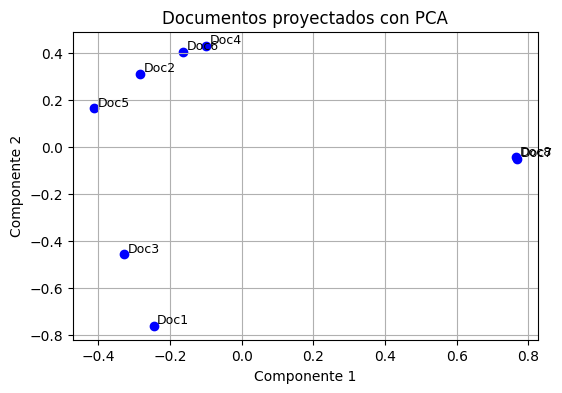

In [ ]:
# Graficar en 2D
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], color='blue')

# Etiquetar puntos con índices o nombres de documentos
for i, doc in enumerate(data):
    plt.text(X_pca[i,0]+0.01, X_pca[i,1]+0.01, f"Doc{i+1}", fontsize=9)

plt.title("Documentos proyectados con PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()


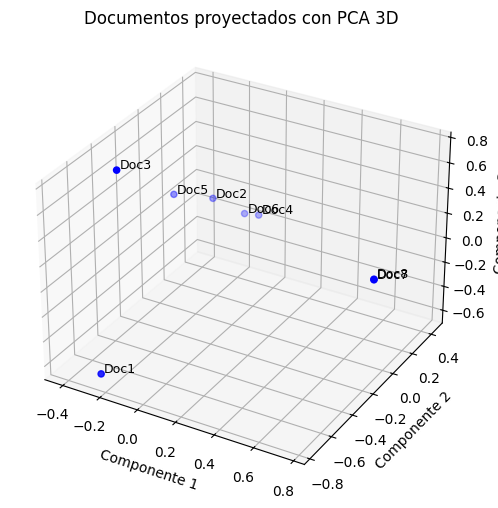

In [ ]:
# Graficar en 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], color='blue')

# Etiquetar cada documento
for i, doc in enumerate(data):
    ax.text(X_pca[i,0]+0.01, X_pca[i,1]+0.01, X_pca[i,2]+0.01, f"Doc{i+1}", fontsize=9)

ax.set_title("Documentos proyectados con PCA 3D")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()

**Métodos no aplicados y por qué**


*   **Chi-cuadrado (SelectKBest) y ANOVA F-test (SelectKBest):** Son métodos supervisados (evalúan la relación feature–etiqueta). Como esta fase es exploratoria sin variable objetivo, no corresponde aplicarlos aún.

* **Análisis Factorial (FA):** Con n=8 y rasgos TF-IDF (distribuciones muy dispersas y esparsas), los supuestos de FA y la estimación de cargas serían frágiles. Además, el objetivo era una reducción operativa (tiempo/memoria) y una vista compacta (PCA), no tanto la inferencia de factores latentes interpretables.

* **Filtro por correlación entre características:** Con 3000 términos y 8 muestras, la matriz de correlación feature-feature es mal condicionada; eliminar columnas por ese criterio podría introducir artefactos. Preferimos VarianceThreshold (robusto con esparsidad) + PCA para compresión.




# **Conclusiones**

Reducción drástica y útil. El filtro de varianza redujo de 3000 → 148 (-95.07%) las columnas, lo que disminuye memoria y tiempo de cómputo sin perder variación relevante entre documentos.

Estructura temática clara. La correlación entre documentos mostró pares altamente similares, validando que el espacio TF-IDF capta bien la proximidad semántica y sugiriendo posibles clusters o casos de near-duplicate.

Representación compacta para análisis posterior. Con PCA (3D) se obtiene una vista condensada que facilita visualización, detección de grupos y prototipado de modelos rápidos, con la salvedad de la pérdida de interpretabilidad directa de términos.

Criterio metodológico sólido. Se privilegió lo no supervisado (filtros simples + proyección) porque no había etiqueta; se pospusieron métodos supervisados (Chi²/ANOVA) y FA por supuestos no satisfechos y tamaño muestral (n=8).